# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = iris.data
y = iris.target

iris, X, y
## 偷看到結果只有分三群

({'data': array([[5.1, 3.5, 1.4, 0.2],
         [4.9, 3. , 1.4, 0.2],
         [4.7, 3.2, 1.3, 0.2],
         [4.6, 3.1, 1.5, 0.2],
         [5. , 3.6, 1.4, 0.2],
         [5.4, 3.9, 1.7, 0.4],
         [4.6, 3.4, 1.4, 0.3],
         [5. , 3.4, 1.5, 0.2],
         [4.4, 2.9, 1.4, 0.2],
         [4.9, 3.1, 1.5, 0.1],
         [5.4, 3.7, 1.5, 0.2],
         [4.8, 3.4, 1.6, 0.2],
         [4.8, 3. , 1.4, 0.1],
         [4.3, 3. , 1.1, 0.1],
         [5.8, 4. , 1.2, 0.2],
         [5.7, 4.4, 1.5, 0.4],
         [5.4, 3.9, 1.3, 0.4],
         [5.1, 3.5, 1.4, 0.3],
         [5.7, 3.8, 1.7, 0.3],
         [5.1, 3.8, 1.5, 0.3],
         [5.4, 3.4, 1.7, 0.2],
         [5.1, 3.7, 1.5, 0.4],
         [4.6, 3.6, 1. , 0.2],
         [5.1, 3.3, 1.7, 0.5],
         [4.8, 3.4, 1.9, 0.2],
         [5. , 3. , 1.6, 0.2],
         [5. , 3.4, 1.6, 0.4],
         [5.2, 3.5, 1.5, 0.2],
         [5.2, 3.4, 1.4, 0.2],
         [4.7, 3.2, 1.6, 0.2],
         [4.8, 3.1, 1.6, 0.2],
         [5.4, 3.4, 1.5, 0.4],


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

%matplotlib inline

In [3]:
estimators = [('k_means_3', KMeans(n_clusters=3)),
              ('k_means_3_init_5', KMeans(n_clusters=3, n_init= 5)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_5_init_5', KMeans(n_clusters=5, n_init= 5)),
              ('k_means_7', KMeans(n_clusters=7)),
              ('k_means_7_init_5', KMeans(n_clusters=7, n_init= 5))]

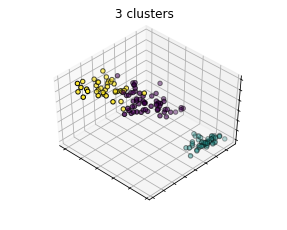

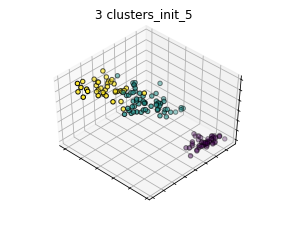

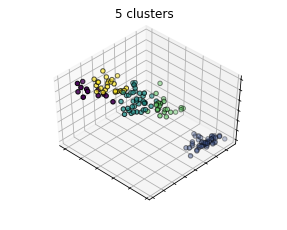

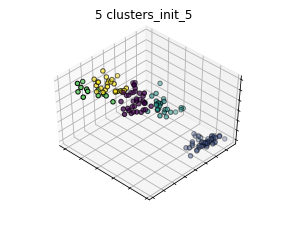

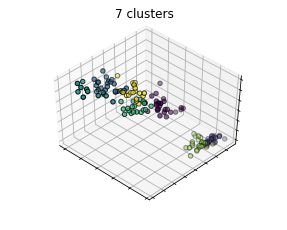

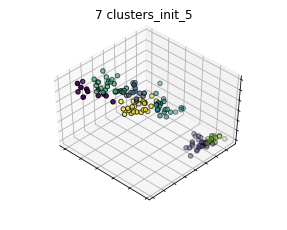

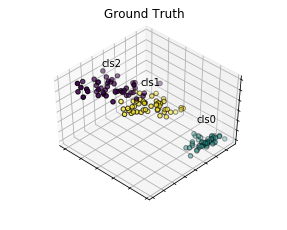

In [4]:
fignum = 1
titles = ['3 clusters', '3 clusters_init_5', '5 clusters', '5 clusters_init_5', '7 clusters', '7 clusters_init_5']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()